In [149]:
# load in different data tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL.ImageColor import colormap

In [ ]:
#The purpose of this code is to clean and visualize the median household income data for various metropolitan areas from 2012 to 2023. To do this, we have imported the data, melted it, fixed formatting issues, handled missing values, and created a line chart to visualize the trends in median household income over the years for each metropolitan area.

In [150]:
#import the data we will be using
med_hh_inc = pd.read_csv('med_hh_inc.csv', sep=',')

In [151]:
#melt the dataframe to have years as a variable
melted_med_hh_inc = pd.melt(med_hh_inc, id_vars=['Metropolitan area'], var_name='Year', value_name='Median_Household_Income')
#preview the dataset
melted_med_hh_inc.head()

,Metropolitan area,Year,Median_Household_Income
0,"Atlanta-Sandy Springs-Roswell, GA Metro Area..",2012,"55,271"
1,"Baltimore-Columbia-Towson, MD Metro Area .",2012,"67,756"
2,"Boston-Cambridge-Newton, MA-NH Metro Area..",2012,"72,571"
3,"Charlotte-Concord-Gastonia, NC-SC Metro Area ..",2012,"53,288"
4,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area..",2012,"60,005"


In [152]:
#split the Metropolitan area column on the first -
melted_med_hh_inc['Metropolitan area'] = melted_med_hh_inc['Metropolitan area'].str.split('-').str[0]
#some need split on the ,
melted_med_hh_inc['Metropolitan area'] = melted_med_hh_inc['Metropolitan area'].str.split(',').str[0]
#replace "Washington" with "WashingtonDC" in the Metropolitan area column
melted_med_hh_inc['Metropolitan area'] = melted_med_hh_inc['Metropolitan area'].replace('Washington', 'WashingtonDC')
#replace "Dallas" with "DFW" in the Metropolitan area column
melted_med_hh_inc['Metropolitan area'] = melted_med_hh_inc['Metropolitan area'].replace('Dallas', 'DFW')
#order the data by Metropolitan area then year
melted_med_hh_inc = melted_med_hh_inc.sort_values(by=['Metropolitan area', 'Year'])
#reset the index of the dataframe
melted_med_hh_inc = melted_med_hh_inc.reset_index(drop=True)

In [153]:
#Remove all the commas from the Median Household Income column
melted_med_hh_inc['Median_Household_Income'] = melted_med_hh_inc['Median_Household_Income'].str.replace(',', '')

#Replace the NaN values with 0
melted_med_hh_inc['Median_Household_Income'] = melted_med_hh_inc['Median_Household_Income'].fillna(0)

#Convert 'Median_Household_Income' column to an integer data type
melted_med_hh_inc['Median_Household_Income'] = melted_med_hh_inc['Median_Household_Income'].astype(int)

In [154]:
print(melted_med_hh_inc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Metropolitan area        300 non-null    object
 1   Year                     300 non-null    object
 2   Median_Household_Income  300 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ KB
None


In [156]:
#replace all 0 values in the "Median_household_income" column with the average of the column right above it and right below it
for i in range(len(melted_med_hh_inc)):
    if melted_med_hh_inc.loc[i, 'Median_Household_Income'] == 0:
        if i > 0 and i < len(melted_med_hh_inc) - 1:
            melted_med_hh_inc.loc[i, 'Median_Household_Income'] = int((melted_med_hh_inc.loc[i - 1, 'Median_Household_Income'] + melted_med_hh_inc.loc[i + 1, 'Median_Household_Income']) / 2)
        elif i == 0:
            melted_med_hh_inc.loc[i, 'Median_Household_Income'] = melted_med_hh_inc.loc[i + 1, 'Median_Household_Income']
        elif i == len(melted_med_hh_inc) - 1:
            melted_med_hh_inc.loc[i, 'Median_Household_Income'] = melted_med_hh_inc.loc[i - 1, 'Median_Household_Income']

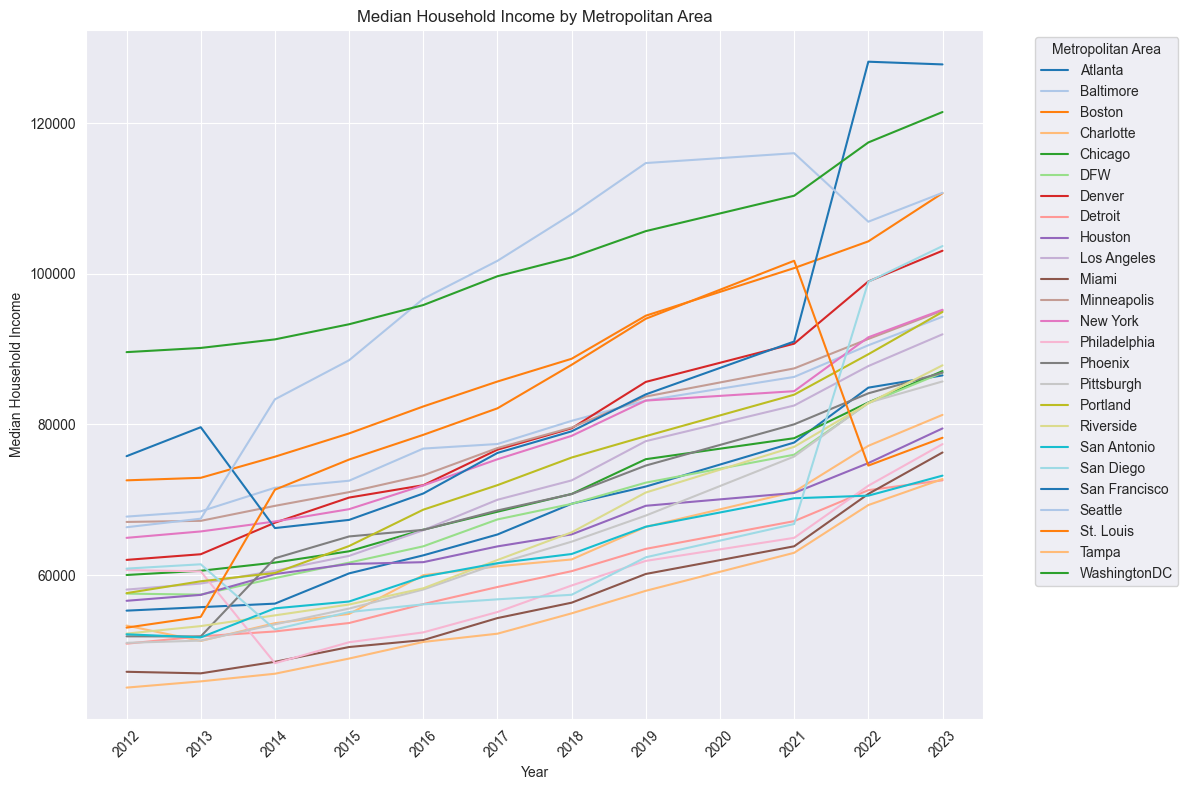

In [159]:
#create a line chart for the years 2012-2023 median household income of each metropolitan area
plt.figure(figsize=(12, 8))
sns.lineplot(data=melted_med_hh_inc, x='Year', y='Median_Household_Income', hue='Metropolitan area', palette='tab20')
plt.title('Median Household Income by Metropolitan Area')
plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.legend(title='Metropolitan Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()